## 회귀(regression) 예측 모델 성능 비교

[공식문서](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## 보스턴 주택가격 데이터 로드

In [2]:
from sklearn.datasets import load_boston

In [3]:
# 데이터 로드
boston = load_boston()

In [4]:
# 보스턴 주택가격 데이터프레임 생성
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
# 데이터프레임에 target 데이터 추가(PRICE 컬럼 생성)
df['PRICE'] = boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

## 데이터셋 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y_target = df['PRICE'] # target 데이터
x_data = df.drop(['PRICE'], axis=1) # target 데이터를 제외한 feature

# 학습/테스트 데이터 분할(test_size: 30%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target,
                                                   test_size=0.3, random_state=156)

In [9]:
# x_train, x_test 크기 확인(7:3 분할된 학습/테스트 데이터)
x_train.shape, x_test.shape

((354, 13), (152, 13))

### 모델 별 성능 확인을 위한 함수

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


# 무작위로 그래프 색상을 선택하기 위한 색상 list
colors = ['b','g','r', 'c', 'm', 'y', 'k', 
          'lightcoral', 'mistyrose', 'tomato', 'darkred', 'sienna',
          'forestgreen', 'royalblue', 'orange', 'lemonchiffon','skyblue',
          'chocolate', 'greenyellow','lime','aqua','lightpink','lightgreen',
          'gold', 'seagreen', 'deepskyblue', 'steelblue', 'slategray']


# 1) plot_pred_actual()
# 실제값과 예측값을 scatter plot으로 보여주는 함수
# 실제값은 'x'로, 예측값은 'o'로 표시하여 어느정도 차이를 보이는지 확인

def plot_pred_actual(pred, actual):
    
    df = pd.DataFrame({'prediction':pred, 'actual':y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.5, marker='o', color='b')
    plt.title('Linear Regression', fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)


# 2) add_msevalue()
# 학습/예측을 실행한 모델명을 key로, 예측값과 실데이터의 MSE를 value로 predictions에 저장
# predictions에 모델명이 없으면 추가, 이미 존재하면 수정

predictions = {} # 알고리즘의 이름과 MSE를 저장할 dictionary

def add_msevalue(model_name, pred, actual):
    
    global predictions

    mse = mean_squared_error(pred, actual) # 실제값과 예측값의 MSE
    predictions[model_name] = mse # predictions에 모델 이름과 해당 모델의 MSE를 저장


# 3) mse_graph()
# predictions에 저장된 모델명과 MSE를 그래프(barh)로 나타내는 함수

def mse_graph():

    global predictions
    global colors

    eval_value = sorted(predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(eval_value, columns=['model', 'mse'])
    print(df)
    min_tick = df['mse'].min() - 10
    max_tick = df['mse'].max() + 10
    
    fig, axes = plt.subplots(figsize=(10,len(df)))
    axes.set_yticks(np.arange(len(df)))
    axes.set_yticklabels(df['model'], fontsize=15)
    bars = axes.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors)) # 그래프 색상은 colors에서 랜덤 지정
        bars[i].set_color(colors[idx])
        axes.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE ', fontsize=15)
    plt.xlim(min_tick, max_tick)

## 모델 적용 

### LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression

              model        mse
0  LinearRegression  17.296916


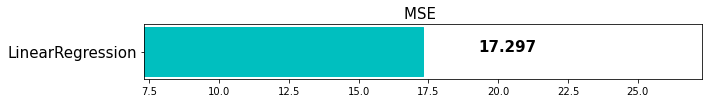

In [12]:
# LinearRegression 알고리즘 학습/예측, MSE 산출 및 MSE 그래프 출력

# 모델 객체 생성
lin_reg = LinearRegression()

# 모델 학습
lin_reg.fit(x_train, y_train)

# 예측 수행
lin_pred = lin_reg.predict(x_test)

# MSE 산출 및 dictionary 저장
add_msevalue('LinearRegression', lin_pred, y_test)

# MSE 그래프 출력
mse_graph()

### RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

              model        mse
0  LinearRegression  17.296916
1      RandomForest   7.366744


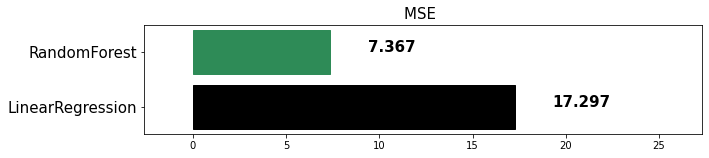

In [17]:
# RandomForest 알고리즘 학습/예측, MSE 산출 및 MSE 그래프 출력

# 모델 객체 생성, 학습/예측
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

# MSE 산출/저장, 그래프 출력
add_msevalue('RandomForest',rfr_pred, y_test)
mse_graph()

# RandomForest 모델의 성능이 월등히 우수함

                 model        mse
0     LinearRegression  17.296916
1  RandomFroest tuning   7.999284
2         RandomForest   7.366744


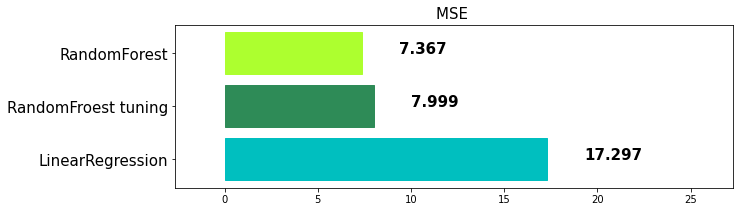

In [18]:
# 하이퍼 파라미터 튜닝

# 모델 객체 생성(n_estimators, max_depth, max_features 하이퍼 파라미터 사용)
rf_t = RandomForestRegressor(random_state=42, n_estimators=500, max_depth=6, max_features=0.9)

# 학습/예측
rf_t.fit(x_train, y_train)
rf_t_pred = rf_t.predict(x_test)

# MSE 산출/저장, 그래프 출력
add_msevalue('RandomFroest tuning', rf_t_pred, y_test)
mse_graph()

###  XGBoost

In [19]:
from xgboost import XGBRegressor

                 model        mse
0     LinearRegression  17.296916
1  RandomFroest tuning   7.999284
2         RandomForest   7.366744
3              XGBoost   6.908383


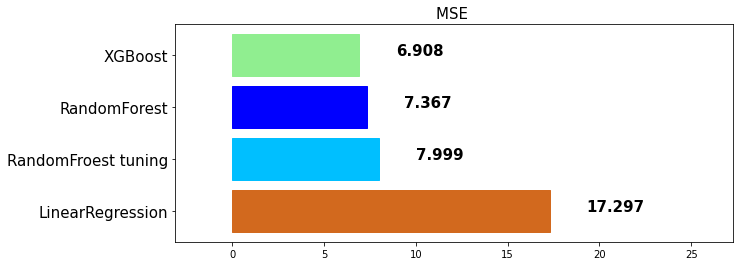

In [26]:
# XGB 알고리즘 학습/예측, MSE 산출 및 MSE 그래프 출력

# 모델 객체 생성, 학습/예측
xg = XGBRegressor(random_state=10)
xg.fit(x_train, y_train)
xg_pred = xg.predict(x_test)

# MSE 산출/저장, 그래프 출력
add_msevalue('XGBoost', xg_pred, y_test)
mse_graph()

                 model        mse
0     LinearRegression  17.296916
1  RandomFroest tuning   7.999284
2         RandomForest   7.366744
3              XGBoost   6.908383
4       XGBoost tuning   6.908383


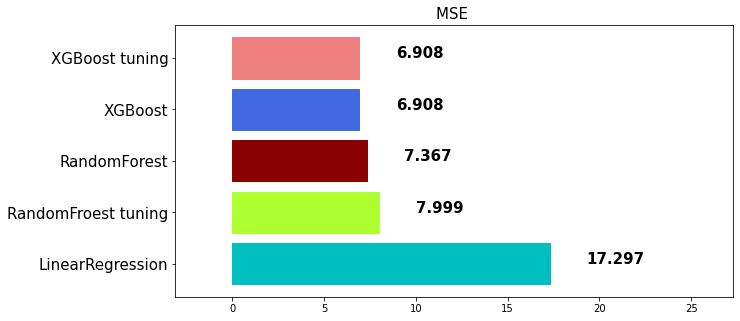

In [30]:
# 하이퍼 파라미터 튜닝

# 모델 객체 생성(learning_rate, n_estimators, subsample, max_depth 하이퍼 파라미터 사용)
xg_t = XGBRegressor(random_state=42,
                    learning_rate=0.01, n_estimators=1000, 
                    subsample=0.8,  max_depth=7)

# 학습/예측
xg_t.fit(x_train, y_train)
xgb_t_pred = xg.predict(x_test)

# MSE 산출/저장, 그래프 출력
add_msevalue('XGBoost tuning', xgb_t_pred, y_test)
mse_graph()

# RandomForest, XGBoost 모델의 성능이 월등히 우수하지만,
# LinearRegression, LogisticRegression 모델이 회귀와 분류 모델의 기본